
## Titanic data

### 1. Importing the libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### 2. Loading data

In [2]:
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")

### 3. Exploratory data analysis

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


The training-set has 891 observations
- There are 12 features (we will drop passenger ID as a feature later on)
- The target variable is survived
- We have 7 Numeric (PassengerId, Survived, Pclass, Age, SibSp, Parch, Fare) and 5 categorical Features (Name, Sex, Ticket, Cabin, Embarked)

In [4]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- We can see that 38% out of the training dataset people survived 
- We can also see that the passenger ages range from 0.42 to 80 and has quite a few missing values

In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- We need to convert many features into numeric so that algorithms can be applied to them
- In some cases scaling may be required
- We also need to take care of NaN and missing values

In [6]:
missing_data = train_df.isnull().sum().sort_values(ascending=False)
missing_data

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

- The Embarked feature has only 2 missing values
- Age feature has 177 missing values
- The Cabin feature has 687 missing values

In [7]:
train_df.isnull().sum()
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Let's now try to see which features contribute towards a high survival rate

### 3.1. Gender

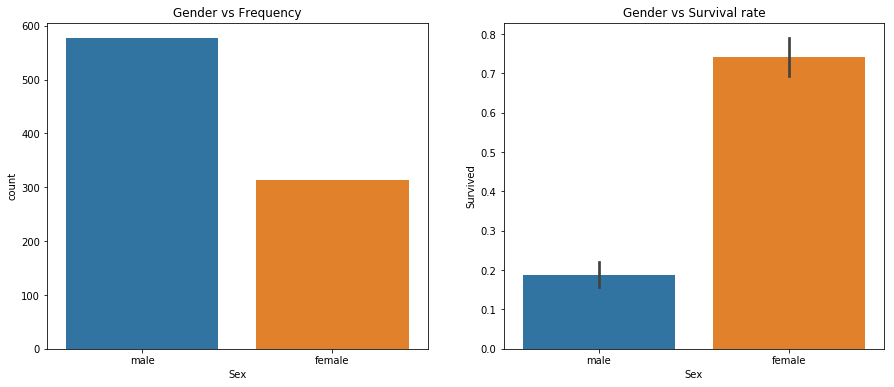

In [8]:
fx, axes = plt.subplots(1, 2, figsize=(15, 6))
axes[0].set_title("Gender vs Frequency")
axes[1].set_title("Gender vs Survival rate")
fig1_gen = sns.countplot(data=train_df, x='Sex', ax=axes[0])
fig2_gen = sns.barplot(data=train_df, x='Sex', y='Survived', ax=axes[1])

- Women have a higher survival rates as compared to men
- Let us see if there is an effect of age on the survival rates

### 3.2. Age and Gender

Text(0.5, 1.0, 'Male')

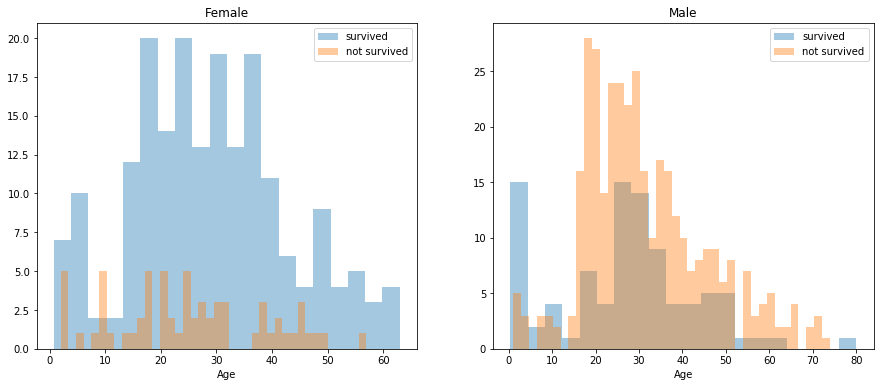

In [9]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15,6))
women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=20, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=20, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
ax.set_title('Male')

- We can see that men have a high probability of survival when they are between 18 and 35 years old
- For women the survival chances are higher between 15 and 40
- Small children have higher rate of survival

### 3.3. Embarked

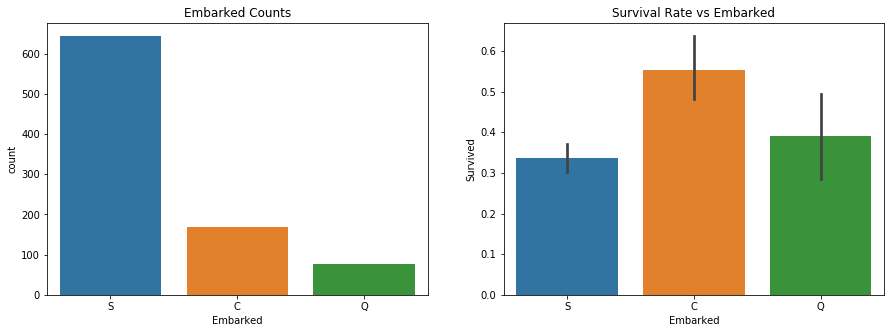

In [10]:
fx, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].set_title('Embarked Counts')
axes[1].set_title('Survival Rate vs Embarked')
fig1_embarked = sns.countplot(x=train_df.Embarked, ax=axes[0])
fig2_embarked = sns.barplot(x=train_df.Embarked, y=train_df.Survived, ax=axes[1])

- Most people embark at 'S' which has the lowest survival rate
- 'C' has the highest survival rate among all the three ports

### 3.4. Embarked, Pclass and Gender

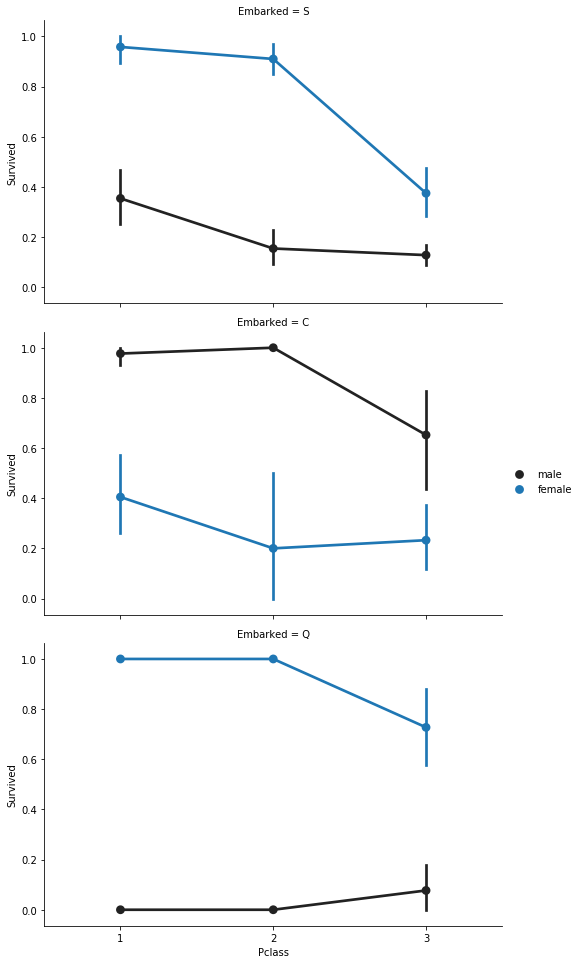

In [11]:
FacetGrid = sns.FacetGrid(train_df, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

- Women on port Q and on port S have a higher chance of survival
- Men have a high survival probability if they are on port C
- Pclass is also correlated with survival

### 3.3. Pclasss

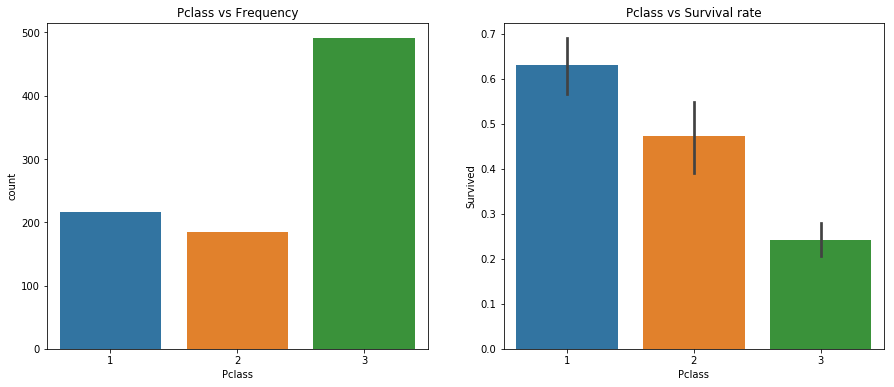

In [12]:
fx, axes = plt.subplots(1, 2, figsize=(15, 6))
axes[0].set_title("Pclass vs Frequency")
axes[1].set_title("Pclass vs Survival rate")
fig1_pclass = sns.countplot(data=train_df, x='Pclass', ax=axes[0])
fig2_pclass = sns.barplot(data=train_df, x='Pclass',y='Survived', ax=axes[1])

- Above we can see that Pclass is contributing to a persons chance of survival, especially if this person is in class 1

### 3.4. SibSp and Parch

Let us combine SibSp and Parch as one feature denoting whether a person is travelling alone or with parents/ relatives/ siblings

In [13]:
data = [train_df, test_df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
train_df['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

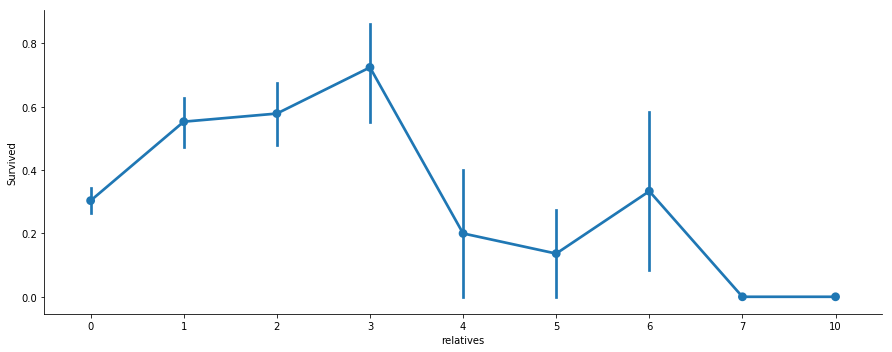

In [14]:
axes = sns.factorplot('relatives','Survived', data=train_df, aspect = 2.5)

- We can see that there was a high probabilty of survival with 1 to 3 realitves
- Having more than 3 relatives lowers the chances of survival

### 4. Data preprocessing

Let's drop ‘PassengerId’ feature from the train set, because it does not contribute to a persons survival chances

In [15]:
train_df = train_df.drop(['PassengerId'], axis=1)

### 4.1. Missing Data and NaN

#### 4.1.1. Cabin
- Cabin number looks like ‘C85’ and the first letter refers to the deck
- We will extract the first letter and create a new feature denoting deck for the person 
- For simplicity we will replace the missing values with zero

In [16]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train_df, test_df]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)
# we can now drop the cabin feature
train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)

#### 4.1.2. Age
We can create an array that contains random numbers, which are computed based on the mean age value in regards to the standard deviation and is_null

In [17]:
data = [train_df, test_df]

for dataset in data:
    mean = train_df["Age"].mean()
    std = test_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int)
train_df["Age"].isnull().sum()

0

#### 4.1.3.Embarked

We will replace the Embarked feature with the most common value, since it has just 2 missing values

In [18]:
train_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [19]:
# 'S' is the most common value
train_df['Embarked'] = train_df['Embarked'].fillna('S')
test_df['Embarked'] = test_df['Embarked'].fillna('S')

### 4.2. Converting features to numeric

In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
Survived     891 non-null int64
Pclass       891 non-null int64
Name         891 non-null object
Sex          891 non-null object
Age          891 non-null int32
SibSp        891 non-null int64
Parch        891 non-null int64
Ticket       891 non-null object
Fare         891 non-null float64
Embarked     891 non-null object
relatives    891 non-null int64
not_alone    891 non-null int32
Deck         891 non-null int32
dtypes: float64(1), int32(3), int64(5), object(4)
memory usage: 80.1+ KB


#### 4.2.1. Sex
Converting ‘Sex’ feature into numeric

In [21]:
genders = {"male": 0, "female": 1}
data = [train_df, test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

#### 4.2.2. Embarked
Converting ‘Embarked’ feature into numeric

In [22]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

#### 4.2.3. Fare
Converting “Fare” from float to int64

In [23]:
data = [train_df, test_df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

#### 4.2.4. Name
We will use just the Titles from the Name and build a new feature

In [24]:
data = [train_df, test_df]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Other": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    
train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)

#### 4.2.5. Ticket

In [25]:
train_df['Ticket'].describe()

count      891
unique     681
top       1601
freq         7
Name: Ticket, dtype: object

It will be difficult to create a categorical variable for tickets, we are better off dropping it

In [26]:
train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)

### 4.3. Creating categories

#### 4.3.1. Age
- Categorizing age into a groups

In [27]:
data = [train_df, test_df]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 10, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 10) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 25), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 25) & (dataset['Age'] <= 35), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 35) & (dataset['Age'] <= 45), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 45) & (dataset['Age'] <= 60), 'Age'] = 5
    dataset.loc[ dataset['Age'] > 60, 'Age'] = 6

train_df['Age'].value_counts()

3    253
2    214
4    157
1    102
5     79
0     64
6     22
Name: Age, dtype: int64

#### 4.3.2. Fare
- Categorizing fare into a groups

In [28]:
data = [train_df, test_df]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 8, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 8) & (dataset['Fare'] <= 15), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 15) & (dataset['Fare'] <= 30), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 100) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)
    
train_df['Fare'].value_counts()

0    311
2    182
1    173
3    172
4     44
5      9
Name: Fare, dtype: int64

### 5. Building Model
We will build a random forest model and use cross validation subsequently

In [29]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()

### 5.1. Random Forest

In [30]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = random_forest.score(X_train, Y_train) * 100
acc_random_forest

92.0314253647587

Let's use cross validtion on the the Random Forest classifier

### 5.2. K-Fold Cross Validation
The code below perform K-Fold Cross Validation on our random forest model, using 10 folds (K = 10)

In [31]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.77777778 0.81111111 0.74157303 0.83146067 0.82022472 0.8988764
 0.78651685 0.79775281 0.83146067 0.85227273]
Mean: 0.8149026784700941
Standard Deviation: 0.04110293160110925


- The average accuracy of our model is 81% with a standard deviation of 4 %

### 5.3. Feature Importance
Let's look at the relative importance of all features

In [32]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
Title,0.200
Sex,0.189
Age,0.133
Pclass,0.098
Fare,0.095
Deck,0.093
relatives,0.064
Embarked,0.054
SibSp,0.038


#### Title, gender and age are the top three factors that contribute to the survival rate

### 6. Hyperparameter Tuning

Let us now perform hyperparamter tuning for the parameters criterion, min_samples_leaf, min_samples_split and n_estimators

In [33]:
param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10, 25, 50],\
              "min_samples_split" : [2, 5, 10, 15, 20, 25], "n_estimators": [100, 250, 500, 1000]}
from sklearn.model_selection import GridSearchCV, cross_val_score
rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)
clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)
clf.fit(X_train, Y_train)
clf.best_params_

{'criterion': 'entropy',
 'min_samples_leaf': 1,
 'min_samples_split': 20,
 'n_estimators': 500}

### 6.1.Trying the new parameters

In [41]:
# Random Forest
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 20,   
                                       n_estimators=500, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

print("oob score:", round(random_forest.oob_score_, 4)*100)

oob score: 82.04


### 7. Final Evaluation

### 7.1. Confusion Matrix

In [35]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

array([[497,  52],
       [ 99, 243]], dtype=int64)

### 7.2. Precision and Recall

In [36]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(Y_train, predictions))
print("Recall:",recall_score(Y_train, predictions))

Precision: 0.823728813559322
Recall: 0.7105263157894737


- Precision is the number of correct positive results divided by the number of all positive results
- precision = true positives / (true positives + false positives)
- Recall is the number of correct positive results divided by the number of positive results that should have been returned
- recall = true positives / (false negatives + true positives)

### 7.3. F-Score

In [37]:
from sklearn.metrics import f1_score
f1_score(Y_train, predictions)

0.7629513343799058

- The F1 score is a measure of a test's accuracy. It considers both the precision and the recall of the test to compute the score. The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst at 0
- F1 score = 2 x (precision x recall) / (precision + recall)

### 7.4. Precision Recall Curve

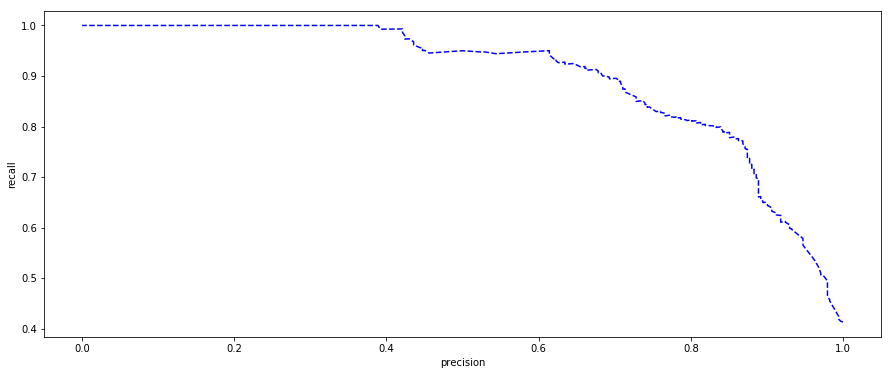

In [38]:
from sklearn.metrics import precision_recall_curve
y_scores = random_forest.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(Y_train, y_scores)

def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, "b--")
    plt.ylabel("recall")
    plt.xlabel("precision")
    
plt.figure(figsize=(15, 6))
plot_precision_vs_recall(precision, recall)
plt.show()

#### Above we can see that the recall is falling down rapidly at a precision of around 85%. So we can choose the trade-off at around 80%

### 7.5. ROC AUC Curve

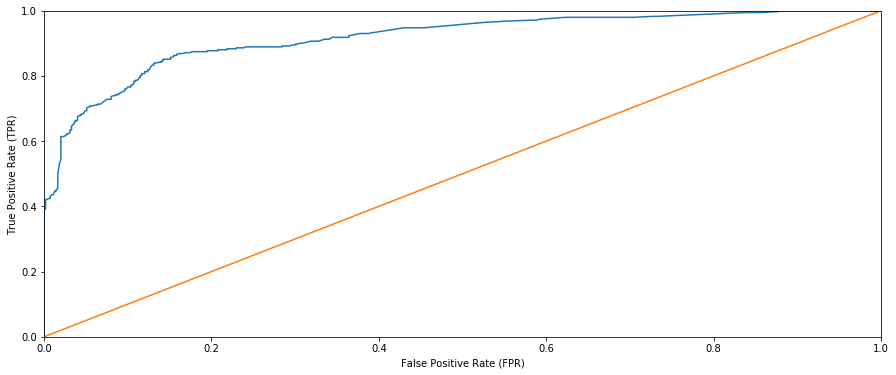

In [39]:
from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, y_scores)

def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, label=label)
    plt.plot([0, 1], [0, 1])
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')

plt.figure(figsize=(15, 6))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

#### With higher the true positive rate the false positive rate also starts to increase

In [40]:
# The ROC AUC Score is the score corresponding to the ROC AUC Curve (area under the curve)
from sklearn.metrics import roc_auc_score
ra_score = roc_auc_score(Y_train, y_scores)
print("ROC-AUC-Score:", ra_score)

ROC-AUC-Score: 0.9168530768329445
